In [1]:
pip install pythran

     |████████████████████████████████| 4.3 MB 6.9 MB/s 
     |████████████████████████████████| 49 kB 6.2 MB/s 
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires gast==0.4.0, but you have gast 0.5.2 which is incompatible.


In [2]:
import numpy as np
import math
import pandas as pd
import pythran
import matplotlib.pyplot as plt

In [3]:
%load_ext pythran.magic

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


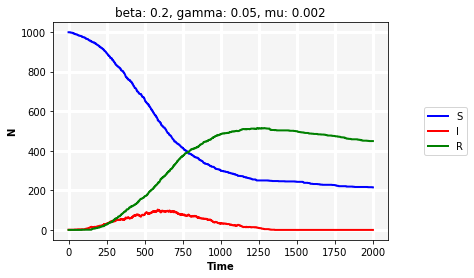

In [30]:
#np.random.seed(123)
mu = 0.002
def sir(u,parms,t):
    
    bet,gamm,iota,N,dt=parms
    S,I,R,Y=u
    lambd = bet*(I+iota)/N
    ifrac = 1.0 - math.exp(-lambd*dt)
    rfrac = 1.0 - math.exp(-gamm*dt)
    dfrac = 1.0 - math.exp(-mu*dt)
    infection = np.random.binomial(S,ifrac)
    recovery = np.random.binomial(I,rfrac)
    death_S = np.random.binomial(S, dfrac)
    death_I = np.random.binomial(I, dfrac)
    death_R = np.random.binomial(R, dfrac)
    return [S-infection-death_S,I+infection-recovery-death_I,R+recovery-death_R,Y+infection]

# Here we change the value of beta from 0.1 to 0.1+0.01 * 50 = 0.51, mu = 0.00002
def simulate():
    parms = [0.2, 0.1, 0.01, 1000.0, 0.1]
    tf = 2000
    tl = 2000
    t = np.linspace(0,tf,tl)
    S = np.zeros(tl)
    I = np.zeros(tl)
    R = np.zeros(tl)
    Y = np.zeros(tl)
    u = [999,1,0,0]
    S[0],I[0],R[0],Y[0] = u
    for j in range(1,tl):
        u = sir(u,parms,t[j])
        S[j],I[j],R[j],Y[j] = u
    return {'t':t,'S':S,'I':I,'R':R,'Y':Y}

sir_out = pd.DataFrame(simulate())



sline = plt.plot("t","S","",data=sir_out,color="blue",linewidth=2)
iline = plt.plot("t","I","",data=sir_out,color="red",linewidth=2)
rline = plt.plot("t","R","",data=sir_out,color="green",linewidth=2)


#plt.ylim([0,700])
#plt.xlim([0,50])
plt.title("beta: " + str(0.2) + ", gamma: " + str(0.05) + ", mu: " + str(round(mu, 5)))
plt.xlabel("Time",fontweight="bold")
plt.ylabel("N",fontweight="bold")


legend = plt.legend(loc=5,bbox_to_anchor=(1.25,0.5))
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_linewidth(1)

plt.grid(color='w', linewidth=3)
ax = plt.axes()
ax.set_facecolor('whitesmoke')